# CENSUS TRACK - Basic FOOD DESERT Tutorial

##### The following module performs basic data collection, dataset merging, and visualization of Food Desert for Indiana as provided by USDA.  

##### This tutorial is designed in a way to perform the Food Desert Visualization for any State in the US. 

### This import module is ignore unecessary warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Following Modules are necessary for this Tutorial

In [5]:
# loading in necessary modules
import pandas as pd # viewing and manipulating excel files
import geopandas as gpd # viewing and manipulating geospatial data
import matplotlib.pyplot as plt # plotting the data

import requests # sends requests to the web to get the data 
import zipfile # handle zip files
import os # creating file directories (folders) within the operating system (os)
import shutil # handling the downloaded file such as copying, moving, and deletion. 

## Census Tract TIGER File (Shape file)

##### Topologically Integrated Geographic Encoding and Referencing (TIGER) files are a collection of geographic data used for mapping and spatial perform analysis. These files contain information about various entities such as roads, boundaries, and landmarks. They are often used along with demographic data to make detailed maps. 
##### Census track file for Indiana was downloaded. The file comes as a zip file that consists of a shape (.shp) file which will be used for the purpose of this tutorial. The link to where the dataset was downloaded from : https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html#list-tab-790442341

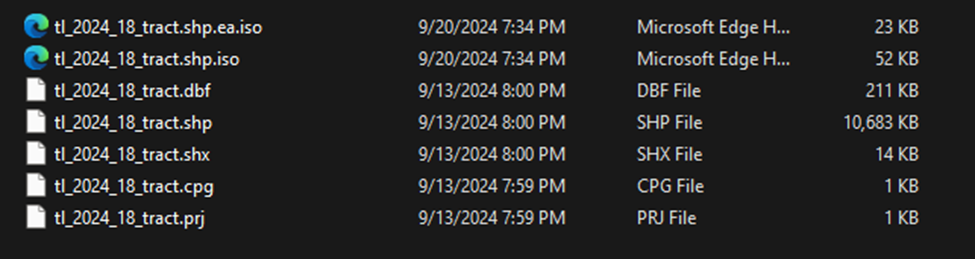

#### .shp file stores the geometric data, like points, lines, and polygons and their attributes. 
#### .dbf stores the attribute data i.e., in tabular form. 
#### .shx acts a link between the .shp and .dbf files in the form of index (navigation). This file allows GOS to quicky seek forwards and backwards through the file.  
#### All of the three files must be present in the same directory for the .shp to work, otherwise it would be incomplete and unusable. 

### Download the Census Tract Data for a State

##### The fips code for each state was taken from here: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

In [5]:
# FIPS of States in USA
fips_to_state = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District of Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    23: "Maine", 24: "Maryland", 25: "Massachusetts", 26: "Michigan",
    27: "Minnesota", 28: "Mississippi", 29: "Missouri", 30: "Montana",
    31: "Nebraska", 32: "Nevada", 33: "New Hampshire", 34: "New Jersey",
    35: "New Mexico", 36: "New York", 37: "North Carolina", 38: "North Dakota",
    39: "Ohio", 40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania", 44: "Rhode Island",
    45: "South Carolina", 46: "South Dakota", 47: "Tennessee", 48: "Texas",
    49: "Utah", 50: "Vermont", 51: "Virginia", 53: "Washington", 54: "West Virginia",
    55: "Wisconsin", 56: "Wyoming"
}

### Select the Desired State here!

In [ ]:
fips = 18  # Indiana 

### Download the Shape File Function

In [8]:
def download_extract_rename_zip_file(number):
    base_url = "https://www2.census.gov/geo/tiger/TIGER2019/TRACT/"
    file_name = f"tl_2019_{number:02d}_tract.zip"
    url = base_url + file_name
    
    # Download the .zip file
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(file_name, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded {file_name}")
        else:
            print(f"Failed to download {file_name}. Status code: {response.status_code}")
            return None, None
    except requests.RequestException as e:
        print(f"Error downloading {file_name}: {e}")
        return None, None

    # Extract the .zip file
    extract_folder = file_name[:-4]
    try:
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
        print(f"Extracted {file_name} to folder {extract_folder}")
    except zipfile.BadZipFile as e:
        print(f"Error extracting {file_name}: {e}")
        return None, None
    finally:
        # Delete the .zip file
        try:
            os.remove(file_name)
            print(f"Deleted {file_name}")
        except OSError as e:
            print(f"Error deleting {file_name}: {e}")

    # Get the state name based on the FIPS code
    state_name = fips_to_state.get(number)
    if state_name:
        new_folder_name = f"{state_name}_TIGER"
        try:
            # Check if the target folder already exists and delete it
            if os.path.exists(new_folder_name):
                shutil.rmtree(new_folder_name)
                print(f"Deleted existing folder {new_folder_name}")
            os.rename(extract_folder, new_folder_name)
            print(f"Renamed folder to {new_folder_name}")
            return new_folder_name, state_name
        except OSError as e:
            print(f"Error renaming folder to {new_folder_name}: {e}")
            return extract_folder, state_name
    else:
        print(f"No state name found for FIPS code {number}. Keeping default folder name.")
        return extract_folder, None

### Add the fips code for the interested State and call the function!

In [ ]:
folder_name, state_name = download_extract_rename_zip_file(fips)

### Call the .shp CENSUS TRACT File from the downloaded file. 

In [13]:
def display_shapefile(folder_name, number, state_name):
    """ Opens and plots the shapefile from the downloaded folder. """
    shp_file = os.path.join(folder_name, f"tl_2019_{number:02d}_tract.shp") # change the 2019 if choosing a shp file from a different year
    
    if os.path.exists(shp_file):
        gdf = gpd.read_file(shp_file)
        #print(gdf.head())  # Display first few rows
        return gdf
        # Plot the shapefile
        #gdf.plot(figsize=(10, 10), edgecolor="black")
        #plt.title(f"Map of {state_name} Census Tracts")
        #plt.show()
    else:
        print(f"Shapefile {shp_file} not found.")
        return None

In [15]:
if folder_name and state_name:
    gdf = display_shapefile(folder_name, fips, state_name)

### Display the contents of the shape file for the state

In [17]:
gdf

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,18,023,950400,18023950400,9504,Census Tract 9504,G5020,S,290184493,136909,+40.2354491,-086.5762758,"POLYGON ((-86.6958 40.18009, -86.6958 40.18439..."
1,18,023,950100,18023950100,9501,Census Tract 9501,G5020,S,296602446,35984,+40.2797050,-086.3279517,"POLYGON ((-86.43202 40.25585, -86.43202 40.257..."
2,18,023,950200,18023950200,9502,Census Tract 9502,G5020,S,303042359,288224,+40.3554672,-086.4592057,"POLYGON ((-86.56824 40.41791, -86.56824 40.417..."
3,18,023,950500,18023950500,9505,Census Tract 9505,G5020,S,4546612,0,+40.2899050,-086.5278416,"POLYGON ((-86.54333 40.28371, -86.54332 40.285..."
4,18,023,950300,18023950300,9503,Census Tract 9503,G5020,S,144303997,0,+40.3731230,-086.6289524,"POLYGON ((-86.69522 40.33266, -86.69511 40.344..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,18,097,355600,18097355600,3556,Census Tract 3556,G5020,S,2444860,0,+39.7601625,-086.1100760,"POLYGON ((-86.12122 39.75743, -86.12122 39.757..."
1507,18,097,355700,18097355700,3557,Census Tract 3557,G5020,S,2201999,0,+39.7630637,-086.1283187,"POLYGON ((-86.14336 39.76429, -86.14336 39.764..."
1508,18,097,380600,18097380600,3806,Census Tract 3806,G5020,S,5485620,0,+39.7002651,-086.1581085,"POLYGON ((-86.17739 39.69851, -86.17739 39.701..."
1509,18,145,710602,18145710602,7106.02,Census Tract 7106.02,G5020,S,1238271,0,+39.5170327,-085.7823538,"POLYGON ((-85.79435 39.51267, -85.79435 39.512..."


## FOOD Desert Data
##### The FOOD Access Research Atlas is a tool developed by the U.S. Department of Agriculture's Economic Research Service (USDA ERS). This data provides a spatial overview of food access indicators by census tract, allowing users to investigate multiple indicators of food store access. 
##### An overview of food access indicators for low-income and other census tracts using different measures of sipermarket accessibility. 
##### The downloaded zip file consists:
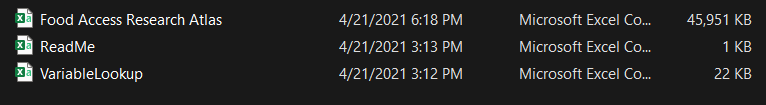

#### Read Me file consists of the citation link of where the data was downloaded from.
#### Variable Lookup is the metadata of the data. This indicates what each column value means in the data. 
#### Food Access Research Atlas is the data itself for the whole of USA until 2019. 

#### The data is taken from https://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data

### Read the Food Desert Data

##### Reading this dataset can take a minute as the dataset is pretty big. 

In [7]:
# Read the Excel file
df = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx', sheet_name=['Food Access Research Atlas'], header=0)

In [9]:
df = df['Food Access Research Atlas']

In [11]:
df

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.713770,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.375235,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.871755,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.604104,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


### Explore what each Field Means

In [44]:
metadata = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx', sheet_name=['Variable Lookup'], header=0)
metadata = metadata['Variable Lookup']
metadata

,Field,LongName,Description
0,CensusTract,Census tract,Census tract number
1,State,State,State name
2,County,County,County name
3,Urban,Urban tract,Flag for urban tract
4,POP2010,"Population, tract total",Population count from 2010 census
...,...,...,...
142,TractAIAN,Tract American Indian and Alaska Native popula...,Total count of American Indian and Alaska Nati...
143,TractOMultir,"Tract Other/Multiple race population, number",Total count of Other/Multiple race population ...
144,TractHispanic,"Tract Hispanic or Latino population, number",Total count of Hispanic or Latino population i...
145,TractHUNV,"Tract housing units without a vehicle, number",Total count of housing units without a vehicle...


### Filter out the State of Interest from Food Desert Data
##### This file has the Food Access data for all the states in the U.S.A in 2019.
##### Performing the analysis on a smaller scale increases the quality of the end-result.

In [25]:
filtered_df = df[df['State'] == f"{state_name}"]

# save the Indiana Atlas as an excel file.
filtered_df.to_excel(f"{folder_name}/{state_name}_Food.xlsx", index=False)

In [26]:
filtered_df

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
23911,18001030100,Indiana,Adams County,0,4737,1796,0,0.0,0.000000,0,...,646.0,4586.0,4.0,10.0,2.0,13.0,122.0,179.0,7.0,95.0
23912,18001030200,Indiana,Adams County,1,4971,2179,0,10.0,0.201167,1,...,866.0,4706.0,23.0,18.0,3.0,18.0,203.0,408.0,49.0,374.0
23913,18001030300,Indiana,Adams County,0,5506,2180,0,220.0,3.995641,0,...,831.0,5259.0,33.0,10.0,1.0,21.0,182.0,425.0,98.0,153.0
23914,18001030400,Indiana,Adams County,1,3400,1123,0,0.0,0.000000,0,...,392.0,3358.0,0.0,5.0,0.0,0.0,37.0,74.0,83.0,31.0
23915,18001030500,Indiana,Adams County,0,6070,1482,0,0.0,0.000000,0,...,475.0,6009.0,9.0,7.0,1.0,3.0,41.0,55.0,460.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25413,18183050300,Indiana,Whitley County,0,5303,2006,0,8.0,0.150858,0,...,687.0,5208.0,13.0,9.0,0.0,9.0,64.0,60.0,75.0,196.0
25414,18183050400,Indiana,Whitley County,1,7038,2939,0,89.0,1.264564,0,...,1185.0,6805.0,36.0,42.0,5.0,20.0,130.0,130.0,32.0,320.0
25415,18183050500,Indiana,Whitley County,0,4875,1847,0,249.0,5.107692,0,...,631.0,4724.0,13.0,5.0,0.0,15.0,118.0,113.0,138.0,200.0
25416,18183050600,Indiana,Whitley County,0,2015,748,0,0.0,0.000000,0,...,236.0,1967.0,4.0,5.0,1.0,15.0,23.0,18.0,9.0,22.0


## Merge the Shape File and Food Desert Data for the State

When joining different datasets, one must ensure that the data type i.e., whether it is an integer, float, string, is the same. We use the columns GEOID from TIGER shape file and CensusTract from Food Access to join the 2 tables. Before joining we convert both these columns into strings.

We use Outer Join so to keep the Rows that do not match (just in case). If you want to keep the rows that has a match use "inner".

In [29]:
# Convert both columns to string to ensure proper merging
filtered_df["CensusTract"] = filtered_df["CensusTract"].astype(str)
gdf["GEOID"] = gdf["GEOID"].astype(str)

# Merge the tables using an inner join to keep only matching rows
merged_df = gdf.merge(filtered_df, left_on="GEOID", right_on="CensusTract", how="outer")

In [31]:
merged_df

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,18,001,030100,18001030100,301,Census Tract 301,G5020,S,201082228,343886,...,646.0,4586.0,4.0,10.0,2.0,13.0,122.0,179.0,7.0,95.0
1,18,001,030200,18001030200,302,Census Tract 302,G5020,S,24308703,178130,...,866.0,4706.0,23.0,18.0,3.0,18.0,203.0,408.0,49.0,374.0
2,18,001,030300,18001030300,303,Census Tract 303,G5020,S,24641573,52005,...,831.0,5259.0,33.0,10.0,1.0,21.0,182.0,425.0,98.0,153.0
3,18,001,030400,18001030400,304,Census Tract 304,G5020,S,187280589,66399,...,392.0,3358.0,0.0,5.0,0.0,0.0,37.0,74.0,83.0,31.0
4,18,001,030500,18001030500,305,Census Tract 305,G5020,S,217367767,336239,...,475.0,6009.0,9.0,7.0,1.0,3.0,41.0,55.0,460.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,18,183,050300,18183050300,503,Census Tract 503,G5020,S,228394325,365699,...,687.0,5208.0,13.0,9.0,0.0,9.0,64.0,60.0,75.0,196.0
1507,18,183,050400,18183050400,504,Census Tract 504,G5020,S,39199811,109763,...,1185.0,6805.0,36.0,42.0,5.0,20.0,130.0,130.0,32.0,320.0
1508,18,183,050500,18183050500,505,Census Tract 505,G5020,S,82117596,100098,...,631.0,4724.0,13.0,5.0,0.0,15.0,118.0,113.0,138.0,200.0
1509,18,183,050600,18183050600,506,Census Tract 506,G5020,S,86668016,106572,...,236.0,1967.0,4.0,5.0,1.0,15.0,23.0,18.0,9.0,22.0


### Save the "merged" File into the State Folder

In [33]:
# save the joint table as .shp file for plotting purposes. 
merged_df.to_file(f"{folder_name}/{state_name}_Tract_Food.shp", driver="ESRI Shapefile")

### Read the file

In [56]:
State_Food = gpd.read_file(f"{folder_name}/{state_name}_Tract_Food.shp")

##### List the columns you would like to plot. 
##### Refer the metadata to explore what each column means!

In [58]:
State_Food.columns.tolist() 

['STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'CensusTrac',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuart',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts',
 'LILATrac_1',
 'LILATrac_2',
 'LILATrac_3',
 'HUNVFlag',
 'LowIncomeT',
 'PovertyRat',
 'MedianFami',
 'LA1and10',
 'LAhalfand1',
 'LA1and20',
 'LATracts_h',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVe',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_1',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfs',
 'lalowihalf',
 'lalowiha_1',
 'lakidshalf',
 'lakidsha_1',
 'laseniorsh',
 'lasenior_1',
 'lawhitehal',
 'lawhiteh_1',
 'lablackhal',
 'lablackh_1',
 'laasianhal',
 'laasianh_1',
 'lanhopihal',
 'lanhopih_1',
 'laaianhalf',
 'laaianha_1',
 'laomultirh',
 'laomulti_1',
 'lahisphalf',
 'lahispha_1',
 'lahunvhalf',
 'lahunvha_1',
 'lasnaphalf',
 'lasnapha_1',
 'lapop1',
 'lapop1shar',
 'lalowi1',
 '

## Plotting Time!

#### Population Plot

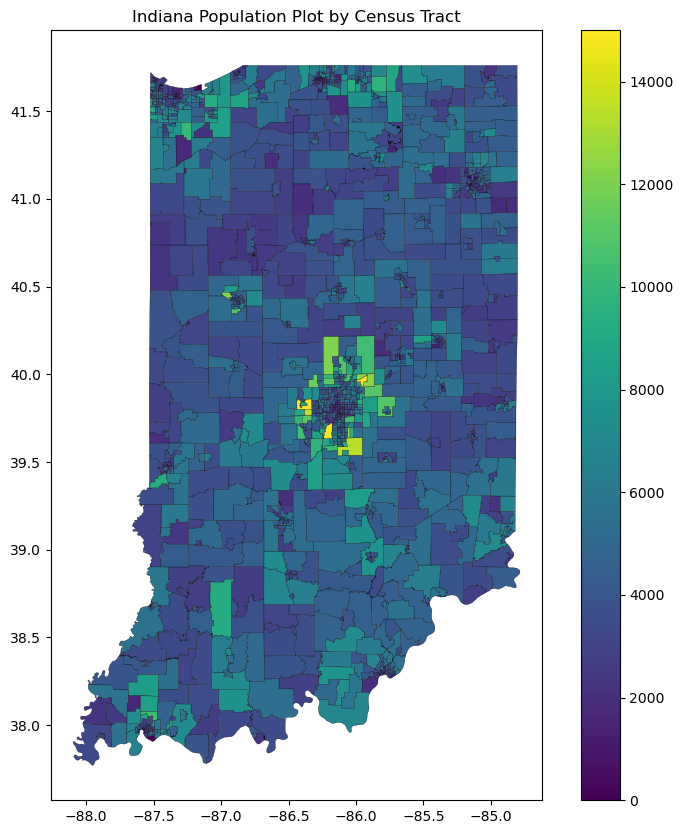

In [95]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
State_Food.plot(ax=ax, column="Pop2010", cmap="viridis", edgecolor='black', linewidth = 0.2, legend=True, vmin=0, vmax=15000)  # Change column as needed
#State_Food.plot(ax=ax, column="LILATracts", cmap="PuRd", legend=True)  # Change column as needed
plt.title(f"{state_name} Population Plot by Census Tract")
plt.show()

### Ensure the range of color pallete is accurate

In [66]:
print(State_Food['Pop2010'].max())
print(State_Food['Pop2010'].min())

18793.0
5.0


### Low Income and Low Access 1 mile (Urban) and 10 miles (Rural)

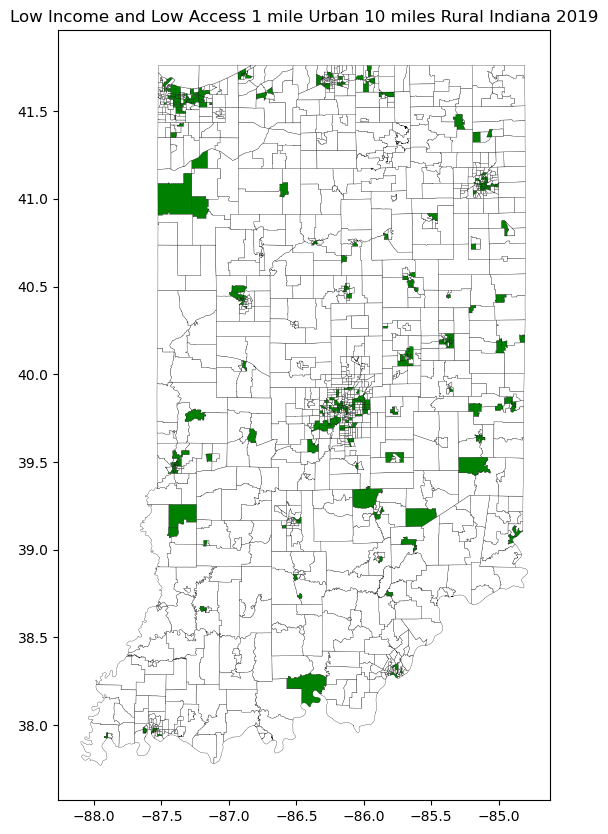

In [74]:
# LILATracts values only has 1 and 0 indicating a "Yes" or "No"
colors = [
    "green" if row.LILATracts == 1 else "white" # change the column here 
    for _, row in State_Food.iterrows()
]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
State_Food.assign(color=colors).plot(
    ax=ax,
    color=State_Food.assign(color=colors)['color'],
    edgecolor='black',
    linewidth=0.2,
    legend=True
)
plt.title(f"Low Income and Low Access 1 mile Urban 10 miles Rural {state_name} 2019")
plt.show()

### Low Income and Low Access 1/2 mile (Urban) 10 miles (rural)

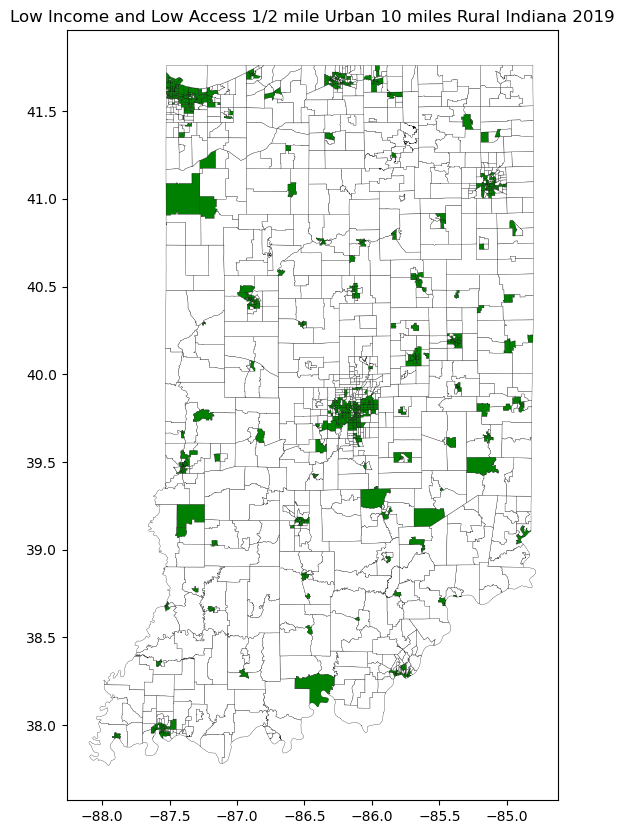

In [76]:
colors = [
    "green" if row.LILATrac_1 == 1 else "white"  
    for _, row in State_Food.iterrows()
]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
State_Food.assign(color=colors).plot(
    ax=ax,
    color=State_Food.assign(color=colors)['color'],
    edgecolor='black',
    linewidth=0.2,
    legend=True
)
plt.title(f"Low Income and Low Access 1/2 mile Urban 10 miles Rural {state_name} 2019")
plt.show()

### Low Income and Low Acess 1 mile (Urban) 20 miles (rural)

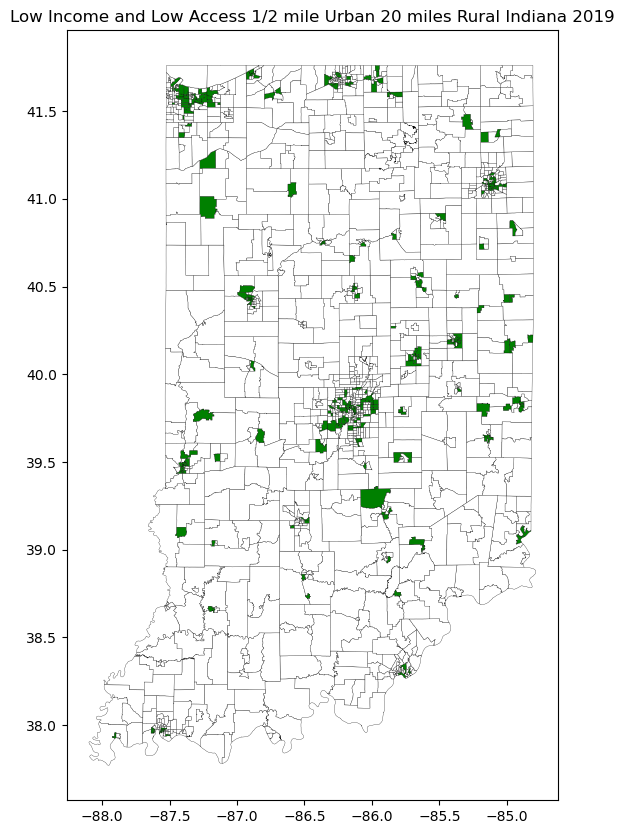

In [78]:
colors = [
    "green" if row.LILATrac_2 == 1 else "white"  
    for _, row in State_Food.iterrows()
]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
State_Food.assign(color=colors).plot(
    ax=ax,
    color=State_Food.assign(color=colors)['color'],
    edgecolor='black',
    linewidth=0.2,
    legend=True
)
plt.title(f"Low Income and Low Access 1/2 mile Urban 20 miles Rural {state_name} 2019")
plt.show()

### No vehicle (more than 100 housing units) and more than 20 miles from Nearest Supermarket

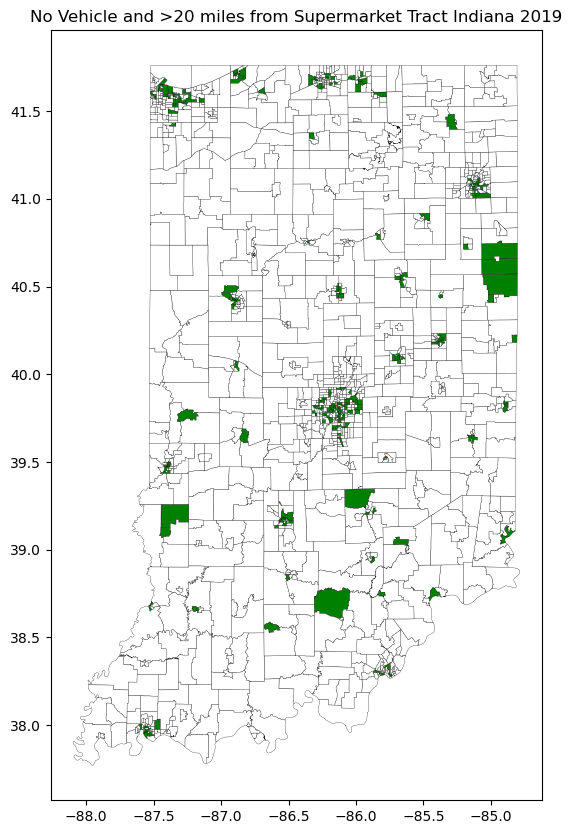

In [82]:
colors = [
    "green" if row.LILATrac_3 == 1 else "white"  
    for _, row in State_Food.iterrows()
]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
State_Food.assign(color=colors).plot(
    ax=ax,
    color=State_Food.assign(color=colors)['color'],
    edgecolor='black',
    linewidth=0.2,
    legend=True
)
plt.title(f"No Vehicle and >20 miles from Supermarket Tract {state_name} 2019")
plt.show()

#### If you want to Zoom in to specific County that can be done as well 

#### Here this is performed Marion County in Indiana. 

##### You can Look up State County Codes here https://unicede.air-worldwide.com/unicede/unicede_indiana_fips_3.html

In [86]:
County = State_Food[State_Food['COUNTYFP']=='097'] # Marion County

In [88]:
County

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMult,TractHispa,TractHUNV,TractSNAP,geometry
789,18,097,310103,18097310103,3101.03,Census Tract 3101.03,G5020,S,35241491,2891906,...,4692.0,1799.0,366.0,0.0,5.0,234.0,175.0,14.0,37.0,"POLYGON ((-86.32812 39.86612, -86.32692 39.866..."
790,18,097,310104,18097310104,3101.04,Census Tract 3101.04,G5020,S,9115608,70590,...,2515.0,729.0,110.0,3.0,6.0,173.0,160.0,257.0,219.0,"POLYGON ((-86.26983 39.91478, -86.26983 39.916..."
791,18,097,310105,18097310105,3101.05,Census Tract 3101.05,G5020,S,7035322,0,...,1949.0,1214.0,90.0,0.0,10.0,268.0,277.0,178.0,141.0,"POLYGON ((-86.26987 39.89801, -86.26986 39.900..."
792,18,097,310106,18097310106,3101.06,Census Tract 3101.06,G5020,S,2247921,0,...,2028.0,1241.0,93.0,0.0,16.0,440.0,624.0,176.0,226.0,"POLYGON ((-86.22224 39.91166, -86.2213 39.9116..."
793,18,097,310108,18097310108,3101.08,Census Tract 3101.08,G5020,S,6599014,2884364,...,2685.0,327.0,113.0,1.0,6.0,123.0,80.0,0.0,17.0,"POLYGON ((-86.32786 39.85196, -86.32228 39.852..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,18,097,390600,18097390600,3906,Census Tract 3906,G5020,S,14386152,0,...,2085.0,2149.0,78.0,3.0,5.0,278.0,308.0,236.0,308.0,"POLYGON ((-86.08237 39.85529, -86.08204 39.855..."
1009,18,097,390700,18097390700,3907,Census Tract 3907,G5020,S,1668887,0,...,1934.0,427.0,15.0,3.0,24.0,761.0,1167.0,216.0,298.0,"POLYGON ((-86.21613 39.77844, -86.21498 39.778..."
1010,18,097,390800,18097390800,3908,Census Tract 3908,G5020,S,28362236,9307,...,3671.0,142.0,27.0,1.0,14.0,214.0,188.0,54.0,106.0,"POLYGON ((-86.32661 39.68563, -86.3266 39.6858..."
1011,18,097,390900,18097390900,3909,Census Tract 3909,G5020,S,1490208,0,...,1228.0,990.0,36.0,0.0,2.0,102.0,87.0,196.0,156.0,"POLYGON ((-86.15236 39.7958, -86.15097 39.7958..."


In [97]:
County.columns.tolist() 

['STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'CensusTrac',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuart',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts',
 'LILATrac_1',
 'LILATrac_2',
 'LILATrac_3',
 'HUNVFlag',
 'LowIncomeT',
 'PovertyRat',
 'MedianFami',
 'LA1and10',
 'LAhalfand1',
 'LA1and20',
 'LATracts_h',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVe',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_1',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfs',
 'lalowihalf',
 'lalowiha_1',
 'lakidshalf',
 'lakidsha_1',
 'laseniorsh',
 'lasenior_1',
 'lawhitehal',
 'lawhiteh_1',
 'lablackhal',
 'lablackh_1',
 'laasianhal',
 'laasianh_1',
 'lanhopihal',
 'lanhopih_1',
 'laaianhalf',
 'laaianha_1',
 'laomultirh',
 'laomulti_1',
 'lahisphalf',
 'lahispha_1',
 'lahunvhalf',
 'lahunvha_1',
 'lasnaphalf',
 'lasnapha_1',
 'lapop1',
 'lapop1shar',
 'lalowi1',
 '

#### Make sure you are choosing the correct column name. Look Up the metadata Excel File if in Doubt!

#### Plotting Just Low Income for Selected County

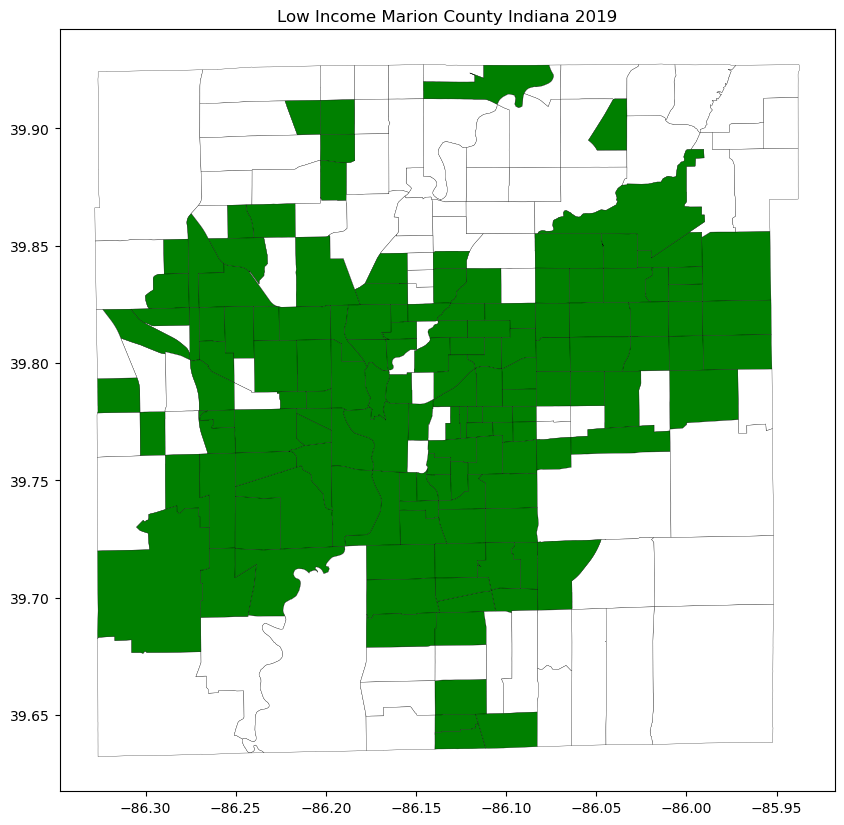

In [102]:
colors = [
    "green" if row.LowIncomeT == 1 else "white"  
    for _, row in County.iterrows()
]

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
County.assign(color=colors).plot(
    ax=ax,
    color=County.assign(color=colors)['color'],
    edgecolor='black',
    linewidth=0.2,
    legend=True
)
plt.title(f"Low Income Marion County {state_name} 2019") # make sure to change title to not get confused!
plt.show()